In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import dataset
DR_df = pd.read_csv("../Resources/DR_complete_clean.csv")
DR_df.head()

,class_,u_,g_,r_,i_,z_,redshift_
0,2,-1.067720,-1.123867,-0.878764,-0.036867,-0.558164,-0.713568
1,2,-0.030126,-0.487516,-0.660599,-0.035391,-0.668300,-0.713270
2,2,-0.429575,-0.452186,-0.317882,-0.009295,-0.131955,-0.713123
3,2,0.489953,0.523653,0.409810,0.026467,0.430269,-0.713607
4,2,-1.644429,-1.964525,-2.027211,-0.111112,-1.892926,-0.713444


In [2]:
print(DR_df.keys())

Index(['class_', 'u_', 'g_', 'r_', 'i_', 'z_', 'redshift_'], dtype='object')


In [3]:
DR_df.shape

(108066, 7)

In [4]:
DR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108066 entries, 0 to 108065
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   class_     108066 non-null  int64  
 1   u_         108066 non-null  float64
 2   g_         108066 non-null  float64
 3   r_         108066 non-null  float64
 4   i_         108066 non-null  float64
 5   z_         108066 non-null  float64
 6   redshift_  108066 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.8 MB


In [5]:
DR_df.describe()

,class_,u_,g_,r_,i_,z_,redshift_
count,108066.000000,1.080660e+05,1.080660e+05,1.080660e+05,1.080660e+05,1.080660e+05,1.080660e+05
mean,0.607425,7.893010e-16,1.798000e-15,-6.579540e-16,-1.271341e-16,6.354724e-16,-3.720993e-16
std,0.830933,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-4.629837e+00,-5.082123e+00,-5.560048e+00,-3.281881e+02,-5.320940e+00,-7.285691e-01
25%,0.000000,-8.037153e-01,-8.501771e-01,-8.420660e-01,-4.354290e-02,-7.924431e-01,-6.525890e-01
50%,0.000000,4.072449e-02,1.856071e-01,1.965557e-01,1.299769e-02,1.354211e-01,-2.493492e-01
75%,1.000000,7.254022e-01,8.317018e-01,7.820679e-01,4.101351e-02,6.252038e-01,1.064407e-01
max,2.000000,3.829115e+00,4.487212e+00,6.098658e+00,3.940064e-01,5.861620e+00,9.187809e+00


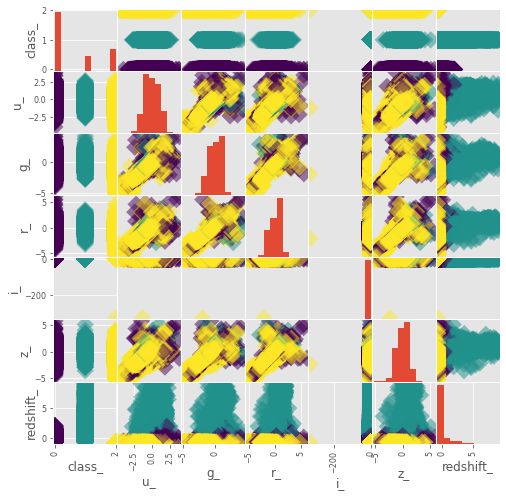

In [6]:
# Scatter Matrix
#_ = pd.plotting.scatter_matrix(DR_df, c=DR_df['class_'], figsize=[8,8], s=150, marker='D')

In [7]:
DR_df.corr()

,class_,u_,g_,r_,i_,z_,redshift_
class_,1.000000,-0.289192,-0.235590,-0.087807,-0.005063,0.050715,-0.051927
u_,-0.289192,1.000000,0.879649,0.763634,0.041868,0.600098,0.204120
g_,-0.235590,0.879649,1.000000,0.943223,0.055520,0.808452,0.329900
r_,-0.087807,0.763634,0.943223,1.000000,0.062306,0.933143,0.436071
i_,-0.005063,0.041868,0.055520,0.062306,1.000000,0.063242,0.030386
z_,0.050715,0.600098,0.808452,0.933143,0.063242,1.000000,0.495998
redshift_,-0.051927,0.204120,0.329900,0.436071,0.030386,0.495998,1.000000


In [14]:
X = DR_df.drop('class_', axis=1) # independent features
y = DR_df['class_'] # Target

X

,u_,g_,r_,i_,z_,redshift_
0,-1.067720,-1.123867,-0.878764,-0.036867,-0.558164,-0.713568
1,-0.030126,-0.487516,-0.660599,-0.035391,-0.668300,-0.713270
2,-0.429575,-0.452186,-0.317882,-0.009295,-0.131955,-0.713123
3,0.489953,0.523653,0.409810,0.026467,0.430269,-0.713607
4,-1.644429,-1.964525,-2.027211,-0.111112,-1.892926,-0.713444
...,...,...,...,...,...,...
108061,-0.892796,-0.712942,-0.405144,-0.007959,-0.020761,-0.714166
108062,0.059325,0.243102,0.497628,0.046889,0.840876,-0.714358
108063,-0.858351,-0.659481,-0.384556,-0.006464,0.003276,-0.713879
108064,-0.143758,-0.044302,0.178776,0.024755,0.487567,-0.713840


In [23]:
import statistics 
mean_redshift_ = statistics.mean(X['redshift_'])

print("Mean of the redshift_ column is " + str('{0:.6g}'.format(mean_redshift_)))

Mean of the redshift_ column is -4.10066e-17


In [25]:
mean_class_ = statistics.mean(y)

print("Mean of the redshift_ column is " + str('{0:.6g}'.format(mean_class_)))

Mean of the redshift_ column is 0.607425


<AxesSubplot:>

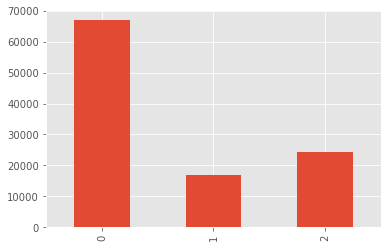

In [36]:
# Number of occurances of each class type in the class_ column
x_labels = ['GAL', 'QSO', 'STAR']
y.value_counts().sort_index().plot.bar(x=x_labels, y='Number of Occurrences')

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0
x_max = 1

mean = 8.0 
std = 2.0

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(X, y, color='coral')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution.png")
plt.show()